* https://www.linkedin.com/learning/pandas-essential-training/welcome?u=36836804
* by Jonathan Fernandes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = 'olympics.csv'
oo = pd.read_csv(path, skiprows=4).convert_dtypes()


In [2]:
chal = oo[(oo.Edition >= 1984) & (oo.Edition <= 2008)]
chal.NOC.value_counts().head(3)

NOC
USA    1837
AUS     762
GER     691
Name: count, dtype: Int64

In [3]:
winner = oo[(oo.Sport == 'Badminton') & (oo.Medal == 'Gold') & (oo.Event == 'singles') & (oo.Gender == 'Men')][['Sport', 'Medal', 'Event', 'Gender', 'NOC']]
winner

,Sport,Medal,Event,Gender,NOC
20045,Badminton,Gold,singles,Men,INA
21787,Badminton,Gold,singles,Men,DEN
23717,Badminton,Gold,singles,Men,CHN
25734,Badminton,Gold,singles,Men,INA
27741,Badminton,Gold,singles,Men,CHN


In [4]:
import matplotlib.pyplot as plt


In [5]:
fo = oo[oo.Edition == 1896]
fo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


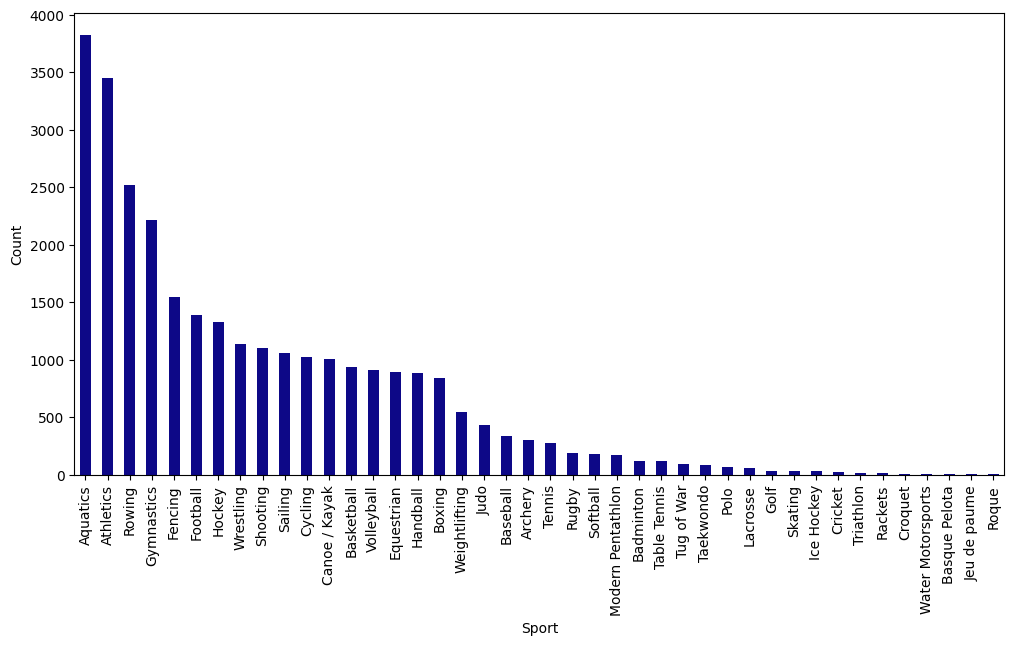

In [6]:
oo.Sport.value_counts().plot(kind='bar', ylabel='Count', figsize=(12,6),  colormap='plasma');


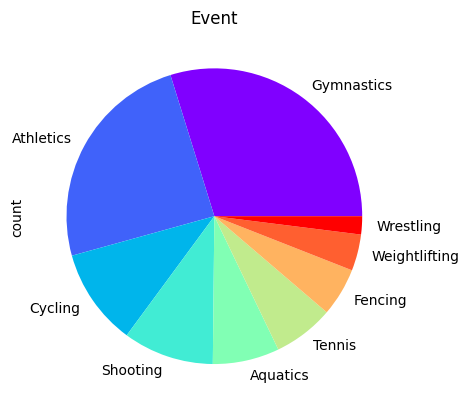

In [7]:
fo.Sport.value_counts().plot(kind='pie', title='Event', colormap='rainbow');

## Seaporn basic plotting

In [8]:
# Seborn is compliment and not a substitute for Matplotlib
# It works well with Pandas
import seaborn as sns

### Plot the number of medals won by China in Beejing 2008

In [9]:
#enclose in brackets for multiple conditions
kina = oo[(oo.NOC == 'CHN') & (oo.Edition == 2008)][['Gender', 'Medal']]
kina.groupby(['Gender', 'Medal']).size().reset_index(name='Count').sort_values(by='Count',ascending=False)

,Gender,Medal,Count
3,Women,Bronze,46
5,Women,Silver,42
4,Women,Gold,40
1,Men,Gold,34
0,Men,Bronze,11
2,Men,Silver,11


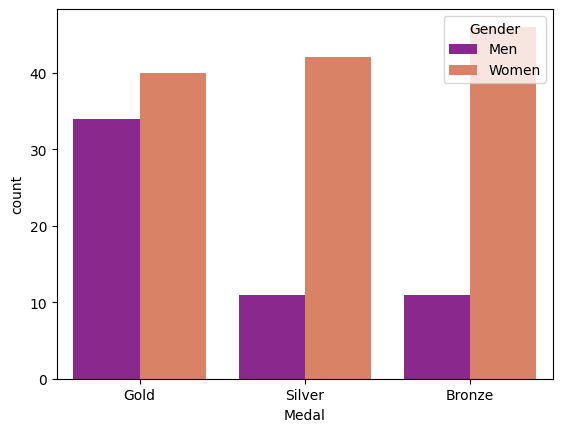

In [10]:
sns.countplot(x='Medal',hue='Gender', data=kina, palette='plasma', legend=True, order=['Gold', 'Silver', 'Bronze']);

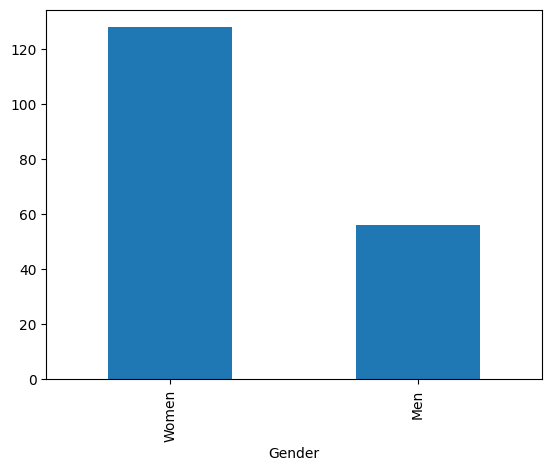

In [11]:
kina.Gender.value_counts().plot(kind='bar');

In [12]:
bolt = oo[(oo.Athlete.str.contains('BOLT')) & (oo.NOC == 'JAM')]
bolt

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27552,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,100m,M,Gold
27570,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,200m,M,Gold
27603,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,4x100m relay,M,Gold


# Index

In [13]:
type(oo.index)

pandas.core.indexes.range.RangeIndex

# Loc and Iloc

In [14]:
oo.loc[oo.Athlete == 'BOLT, Usain']

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27552,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,100m,M,Gold
27570,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,200m,M,Gold
27603,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,4x100m relay,M,Gold


In [15]:
oo.iloc[[1,5,9]]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
5,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200m freestyle,M,Bronze
9,Athens,1896,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400m freestyle,M,Gold


In [16]:
medals_2008 = oo[(oo.Edition == 2008)][['Edition', 'NOC', 'Medal']]

med_2008 = set(medals_2008.NOC)
all_countries = set(oo.NOC)


total = all_countries - med_2008
l = list(total)
print(*l)
len(l)

SUR IRQ KSA HAI GDR PHI BER LUX ANZ PAK URU CRC GUY HKG UAE ZAM URS SCG PAR UGA SEN EUN QAT EUA BWI TAN SYR AHO TGA CIV MKD ISV KUW PER MOZ SRI DJI BAR NIG TCH YUG GHA BOH ERI ZZX LIB FRG RU1 NAM IOP BDI PUR


52

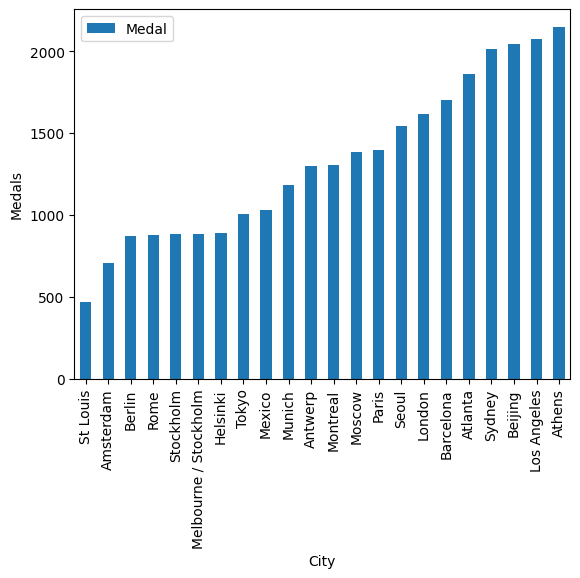

In [17]:
history = oo.iloc[:, [0, -1]].groupby('City').count().sort_values(by='Medal', ascending=True)
history.plot(kind='bar', ylabel='Medals');

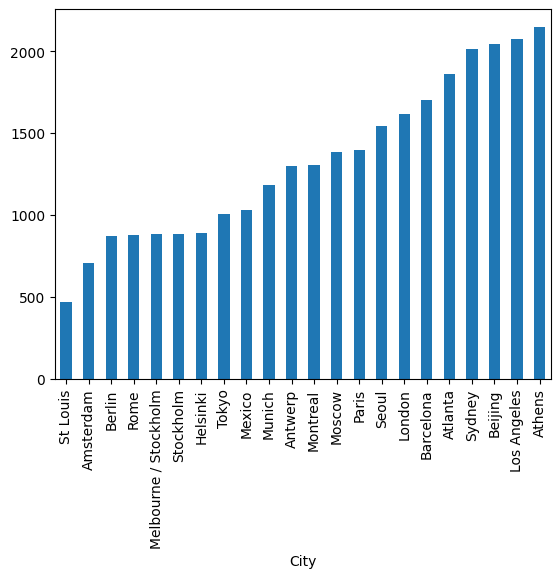

In [18]:
oo.City.value_counts().sort_values(ascending=True).plot(kind='bar');

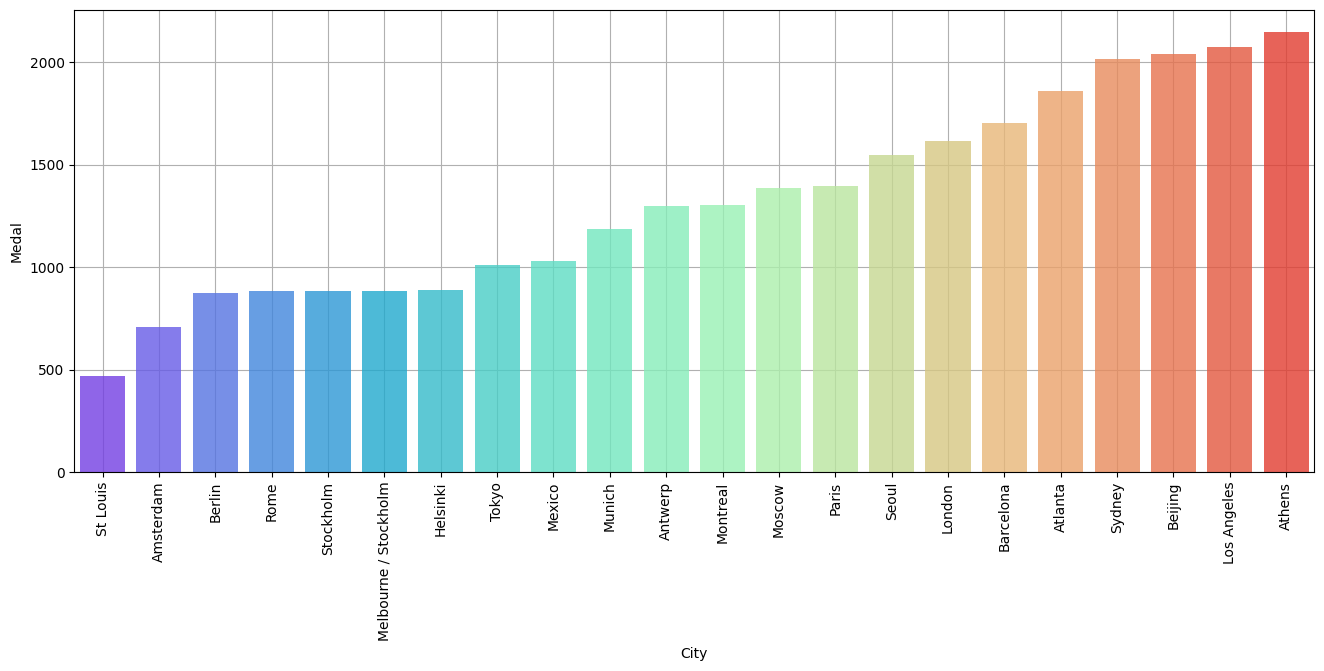

In [19]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x='City', hue='City', y='Medal',ax=ax, data=history, palette='rainbow', legend=False, zorder=2, alpha=.8);
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [20]:
lo = oo[oo.Edition == 2008]
medals_2008 = lo.NOC.value_counts()

# Group By

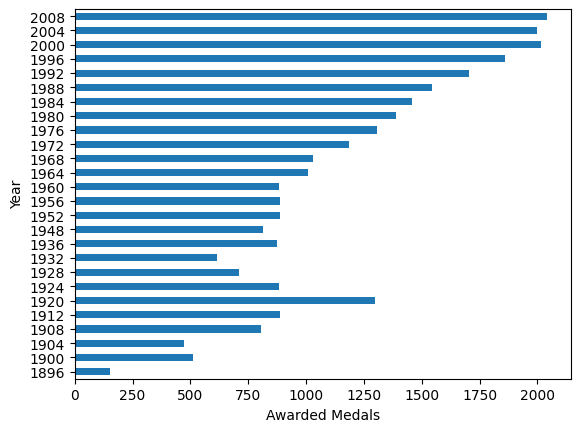

In [21]:
oo.groupby('Edition').size().plot(kind='barh', ylabel='Year', xlabel='Awarded Medals');

In [22]:
oo.Edition.value_counts().sort_values(ascending=True)

Edition
1896     151
1904     470
1900     512
1932     615
1928     710
1908     804
1948     814
1936     875
1960     882
1924     884
1956     885
1912     885
1952     889
1964    1010
1968    1031
1972    1185
1920    1298
1976    1305
1980    1387
1984    1459
1988    1546
1992    1705
1996    1859
2004    1998
2000    2015
2008    2042
Name: count, dtype: Int64

In [23]:
oo.groupby('NOC').agg({'Edition': ['count', 'min', 'max']}).rename(columns=({'count': 'Medals', 'min': 'First', 'max': 'Last'})).reset_index()

NOC Edition            
          Medals First  Last
0    AFG       1  2008  2008
1    AHO       1  1988  1988
2    ALG      14  1984  2008
3    ANZ      29  1908  1912
4    ARG     239  1924  2008
..   ...     ...   ...   ...
133  VIE       2  2000  2008
134  YUG     435  1924  2000
135  ZAM       2  1984  1996
136  ZIM      23  1980  2008
137  ZZX      48  1896  1904

[138 rows x 4 columns]

#  Stack & Unstack

In [24]:
mw = oo[(oo.Edition == 2008) & ((oo.Event == '100m') | (oo.Event  == '200m'))].iloc[ : , [0,1,3,4,5,6,7,-1]]
mw

,City,Edition,Discipline,Athlete,NOC,Gender,Event,Medal
27551,Beijing,2008,Athletics,"DIX, Walter",USA,Men,100m,Bronze
27552,Beijing,2008,Athletics,"BOLT, Usain",JAM,Men,100m,Gold
27553,Beijing,2008,Athletics,"THOMPSON, Richard",TRI,Men,100m,Silver
27554,Beijing,2008,Athletics,"FRASER, Shelly-ann",JAM,Women,100m,Gold
27555,Beijing,2008,Athletics,"SIMPSON, Sherone",JAM,Women,100m,Silver
27556,Beijing,2008,Athletics,"STEWART, Kerron",JAM,Women,100m,Silver
27569,Beijing,2008,Athletics,"DIX, Walter",USA,Men,200m,Bronze
27570,Beijing,2008,Athletics,"BOLT, Usain",JAM,Men,200m,Gold
27571,Beijing,2008,Athletics,"CRAWFORD, Shawn",USA,Men,200m,Silver
27572,Beijing,2008,Athletics,"STEWART, Kerron",JAM,Women,200m,Bronze


In [25]:
gr = mw.groupby(['NOC', 'Gender', 'Discipline', 'Event', 'Medal', 'Athlete']).size()
gr

NOC  Gender  Discipline  Event  Medal   Athlete                 
JAM  Men     Athletics   100m   Gold    BOLT, Usain                 1
                         200m   Gold    BOLT, Usain                 1
     Women   Athletics   100m   Gold    FRASER, Shelly-ann          1
                                Silver  SIMPSON, Sherone            1
                                        STEWART, Kerron             1
                         200m   Bronze  STEWART, Kerron             1
                                Gold    CAMPBELL-BROWN, Veronica    1
TRI  Men     Athletics   100m   Silver  THOMPSON, Richard           1
USA  Men     Athletics   100m   Bronze  DIX, Walter                 1
                         200m   Bronze  DIX, Walter                 1
                                Silver  CRAWFORD, Shawn             1
     Women   Athletics   200m   Silver  FELIX, Allyson              1
dtype: int64

In [26]:
gro = mw.groupby(['NOC', 'Gender', 'Discipline', 'Event', 'Medal', 'Athlete']).size().reset_index(name='Count')
gro

,NOC,Gender,Discipline,Event,Medal,Athlete,Count
0,JAM,Men,Athletics,100m,Gold,"BOLT, Usain",1
1,JAM,Men,Athletics,200m,Gold,"BOLT, Usain",1
2,JAM,Women,Athletics,100m,Gold,"FRASER, Shelly-ann",1
3,JAM,Women,Athletics,100m,Silver,"SIMPSON, Sherone",1
4,JAM,Women,Athletics,100m,Silver,"STEWART, Kerron",1
5,JAM,Women,Athletics,200m,Bronze,"STEWART, Kerron",1
6,JAM,Women,Athletics,200m,Gold,"CAMPBELL-BROWN, Veronica",1
7,TRI,Men,Athletics,100m,Silver,"THOMPSON, Richard",1
8,USA,Men,Athletics,100m,Bronze,"DIX, Walter",1
9,USA,Men,Athletics,200m,Bronze,"DIX, Walter",1


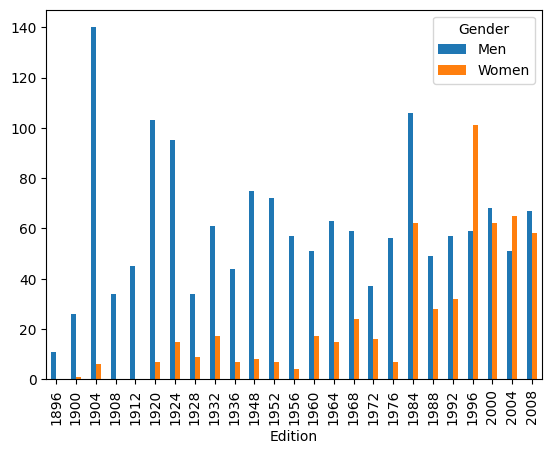

In [27]:
oo[(oo.NOC == 'USA') & (oo.Medal == 'Gold')].groupby(['Edition','Gender']).size().unstack('Gender', fill_value=0).plot(kind='bar');

In [28]:
#top 5 gold
oo[oo['Medal'] == 'Gold'].groupby('Athlete').size().sort_values(ascending=False).reset_index(name='Gold Medals').iloc[:5, :]

,Athlete,Gold Medals
0,"PHELPS, Michael",14
1,"LATYNINA, Larisa",9
2,"NURMI, Paavo",9
3,"LEWIS, Carl",9
4,"SPITZ, Mark",9


In [29]:
top_5_gold = oo.groupby(['Athlete', 'Medal']).size().unstack('Medal', fill_value=0)

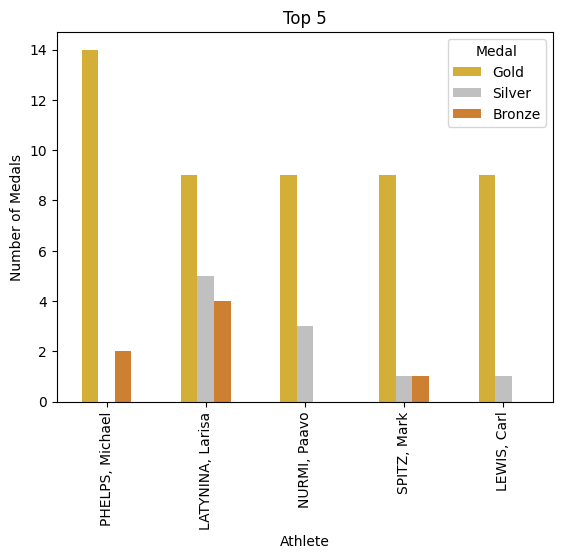

In [30]:
top_5_gold.sort_values(by=['Gold', 'Silver', 'Bronze'], ascending=False)[['Gold', 'Silver', 'Bronze']].iloc[:5, :].plot(kind='bar', color=['#d4af37', '#c0c0c0', '#cd7f32'], title='Top 5', ylabel='Number of Medals');

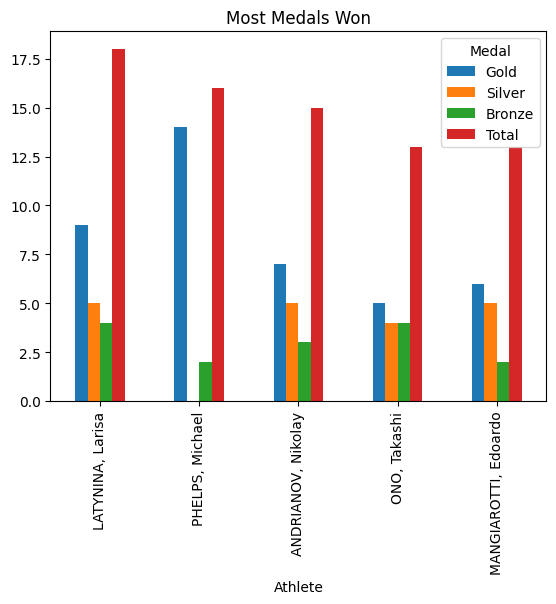

In [31]:
guld = oo.groupby(['Athlete', 'Medal']).size().unstack('Medal', fill_value=0)[['Gold', 'Silver', 'Bronze']]
guld['Total'] = guld.sum(axis=1)
guld.sort_values(by='Total', ascending=False).iloc[:5, :].plot(kind='bar', title='Most Medals Won');

# Data Visualizations
### Learning heatmaps

In [32]:
lo = oo[oo.Edition == 2008]
grouping = lo.groupby(['NOC', 'Medal']).size().unstack('Medal', fill_value=0)
g = grouping.sort_values(by=['Gold', 'Silver', 'Bronze'], ascending=False)[['Gold', 'Silver', 'Bronze']].head(15)


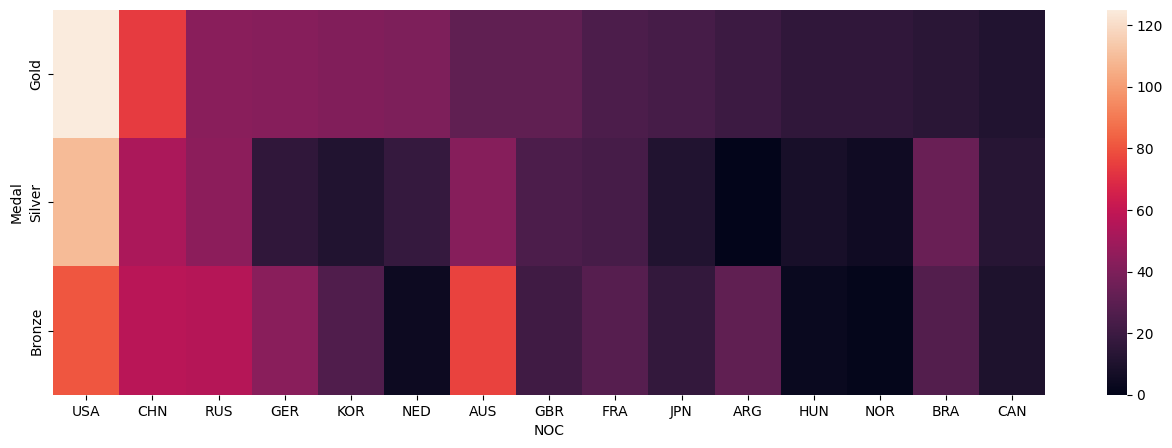

In [33]:
g = g.transpose()
plt.figure(figsize=(16,5))
sns.heatmap(g);

## Challenge
* In every edition to date which US athlete has won the most medals
* Include the athlete's discipline

In [34]:
gy = oo[oo.NOC == 'USA']
gy = gy.groupby(['Edition', 'Athlete', 'Medal']).size().unstack('Medal', fill_value=0)[['Gold', 'Silver', 'Bronze']]
gy['Total'] = gy.sum(axis=1)
gy.reset_index(inplace=True)

li = []
for year, group in gy.groupby('Edition'):
    li.append(group.sort_values(by='Total', ascending=False).iloc[:1,])

In [35]:
arr = np.array(li)
arr = arr.reshape(25,6)
cols = ['Edition', 'Athlete', 'Gold',  'Silver',  'Bronze',  'Total']

df = pd.DataFrame(data=arr, columns=cols)
df

,Edition,Athlete,Gold,Silver,Bronze,Total
0,1896,"GARRETT, Robert",2,2,0,4
1,1900,"BAXTER, Irving",2,3,0,5
2,1904,"HEIDA, Anton",5,1,0,6
3,1908,"SHERIDAN, Martin",2,0,1,3
4,1912,"OSBURN, Carl Townsend",1,2,1,4
5,1920,"LEE, Willis",5,1,1,7
6,1924,"WEISSMULLER, Johnny",3,0,1,4
7,1928,"OSIPOWICH, Albina Lucy",2,0,0,2
8,1932,"DIDRIKSON, Mildred",2,1,0,3
9,1936,"OWENS, Jesse",4,0,0,4


In [44]:
phelps = oo[oo.Athlete == 'PHELPS, Michael']
phelps.groupby(['Edition','Medal']).size().unstack('Medal', fill_value=0)
phelps.reset_index()


,index,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,25225,Athens,2004,Aquatics,Swimming,"PHELPS, Michael",USA,Men,100m butterfly,M,Gold
1,25253,Athens,2004,Aquatics,Swimming,"PHELPS, Michael",USA,Men,200m butterfly,M,Gold
2,25258,Athens,2004,Aquatics,Swimming,"PHELPS, Michael",USA,Men,200m freestyle,M,Bronze
3,25265,Athens,2004,Aquatics,Swimming,"PHELPS, Michael",USA,Men,200m individual medley,M,Gold
4,25277,Athens,2004,Aquatics,Swimming,"PHELPS, Michael",USA,Men,400m individual medley,M,Gold
5,25286,Athens,2004,Aquatics,Swimming,"PHELPS, Michael",USA,Men,4x100m freestyle relay,M,Bronze
6,25325,Athens,2004,Aquatics,Swimming,"PHELPS, Michael",USA,Men,4x100m medley relay,M,Gold
7,25361,Athens,2004,Aquatics,Swimming,"PHELPS, Michael",USA,Men,4x200m freestyle relay,M,Gold
8,27224,Beijing,2008,Aquatics,Swimming,"PHELPS, Michael",USA,Men,100m butterfly,M,Gold
9,27252,Beijing,2008,Aquatics,Swimming,"PHELPS, Michael",USA,Men,200m butterfly,M,Gold
